In [1]:
import os
import glob

# Specify the path to the main directory
main_dir = '/home/omkarp17/Downloads/dataset(v2)/dataset/data/train'

# Get a list of all subdirectories
subdirs = [os.path.basename(x) for x in glob.glob(os.path.join(main_dir, '*')) if os.path.isdir(x)]

# Join the subdirectory names into a single string with commas and double quotes
result = '", "'.join(subdirs)

# Add double quotes at the beginning and end of the string
result = '"' + result + '"'

# Print the result
print(result)


"ice", "melted", "fresh_snow"


In [3]:
import tensorflow as tf
 
import os

import shutil

import numpy as np

from sklearn.model_selection import train_test_split
 
classes = ["Heavy_Snow", "Light_Snow", "Refrozen_Ice", "Sleet", "Slush", "Packed_Snow", "Black_Ice"] # replace with your actual class names

data_dir = '/home/omkarp17/Desktop/Dataset/train1/train2'

train_dir = '/home/omkarp17/Desktop/Dataset/train1/Video_Code/train'

test_dir = '/home/omkarp17/Desktop/Dataset/train1/Video_Code/test'
 
# Create train and test directories

os.makedirs(train_dir, exist_ok=True)

os.makedirs(test_dir, exist_ok=True)
 
for cls in classes:

    # Create class-specific train and test directories

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)

    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
 
    # Get a list of all image files for this class

    image_files = os.listdir(os.path.join(data_dir, cls))
 
    # Split the files into train and test sets

    train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)  # 80% train, 20% test
 
    # Copy the train files into the train directory

    for file in train_files:

        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))
 
    # Copy the test files into the test directory

    for file in test_files:

        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))

In [6]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import Adam

import scipy

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
 
 
# Define the data generators

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(

    '/home/omkarp17/Desktop/Dataset/train1/Video_Code/train',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical')
 
test_generator = test_datagen.flow_from_directory(

    '/home/omkarp17/Desktop/Dataset/train1/Video_Code/test',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical')

Found 175 images belonging to 7 classes.
Found 78 images belonging to 7 classes.


In [7]:

baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))
 
# Construct the head of the model that will be placed on top of the base model

headModel = baseModel.output

headModel = Flatten(name="flatten")(headModel)

headModel = Dense(512, activation="relu")(headModel)

headModel = Dense(7, activation="softmax")(headModel)  # Change the number here according to your number of classes
 
# Place the head FC model on top of the base model (this will become the actual model we will train)

model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)
 
# Loop over all layers in the base model and freeze them so they will not be updated during the training process

for layer in baseModel.layers:

    layer.trainable = False
 
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
 
model.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=[early_stopping, model_checkpoint])

Epoch 1/10


/home/omkarp17/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.3246 - loss: 1.9524 - val_accuracy: 0.6538 - val_loss: 1.4415
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.8260 - loss: 0.8118 - val_accuracy: 0.7051 - val_loss: 0.9438
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.9176 - loss: 0.3791 - val_accuracy: 0.7692 - val_loss: 0.7402
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.9177 - loss: 0.3167 - val_accuracy: 0.7564 - val_loss: 0.7184
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.9633 - loss: 0.1466 - val_accuracy: 0.8077 - val_loss: 0.6419
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.9817 - loss: 0.1020 - val_accuracy: 0.8077 - val_loss: 0.5741
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 1.0000 - loss: 0.0522 - val_accuracy: 0.8205 - val_loss: 0.5754


Found 78 images belonging to 7 classes.


/home/omkarp17/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step


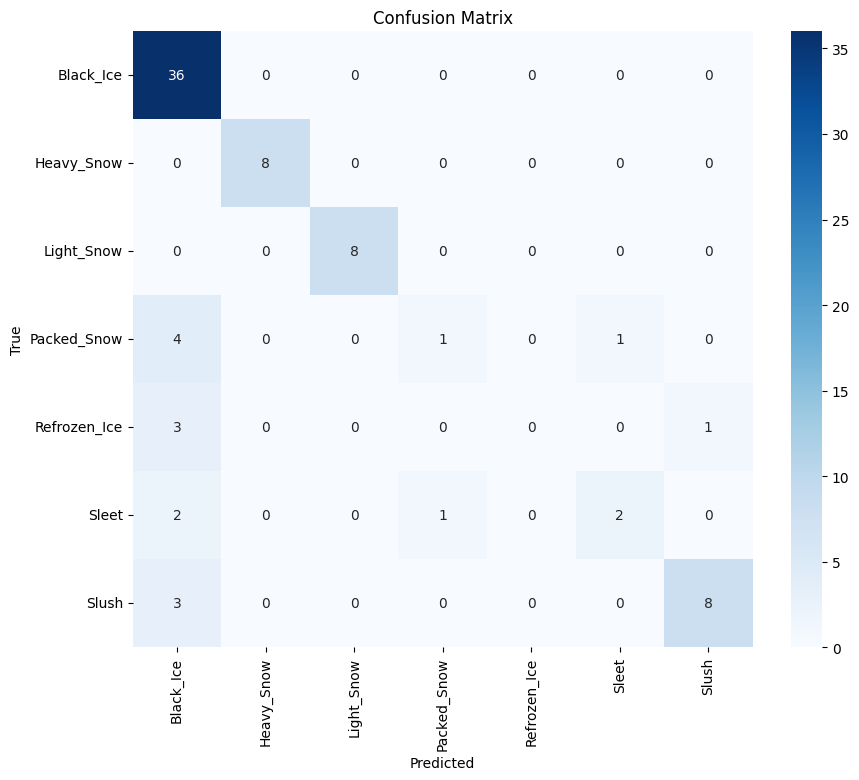

              precision    recall  f1-score   support

   Black_Ice       0.75      1.00      0.86        36
  Heavy_Snow       1.00      1.00      1.00         8
  Light_Snow       1.00      1.00      1.00         8
 Packed_Snow       0.50      0.17      0.25         6
Refrozen_Ice       0.00      0.00      0.00         4
       Sleet       0.67      0.40      0.50         5
       Slush       0.89      0.73      0.80        11

    accuracy                           0.81        78
   macro avg       0.69      0.61      0.63        78
weighted avg       0.76      0.81      0.76        78



/home/omkarp17/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/omkarp17/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/omkarp17/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
 
# Load the trained model

model = tf.keras.models.load_model('best_model.keras')
 
# Load the test data

test_generator = test_datagen.flow_from_directory(

    '/home/omkarp17/Desktop/Dataset/train1/Video_Code/test',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical',

    shuffle=False)
 
# Make predictions

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())
 
# Generate the confusion matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)
 
# Plot the confusion matrix

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()
 
# Print classification report

print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the Keras model
model = load_model('/home/omkarp17/Downloads/dataset(v2)/dataset/data/best_model.keras')

# Load the video file
image_dir = '/home/omkarp17/Downloads/dataset(v2)/dataset/data/train'

# Create a VideoWriter object only once
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 1  # set the FPS to 1 for 5-second display per image
video_width = 1280
video_height = 720
output_video_writer = cv2.VideoWriter('rscd_output.mp4', fourcc, fps, (video_width, video_height))

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

# Define the class names
class_names = ["ice", "melted", "fresh_snow"]  # replace with your actual class names

for image_file in image_files:
    # Read the image file
    image = cv2.imread(image_file)

    # Resize the image to match the output video size
    resized_image = cv2.resize(image, (video_width, video_height))

    # Make predictions on the image
    resized_image_for_model = cv2.resize(resized_image, (224,224))
    normalized_image_for_model = resized_image_for_model / 255.0
    image_array_for_model = np.array([normalized_image_for_model])
    predictions = model.predict(image_array_for_model)
    class_id = np.argmax(predictions, axis=1)
    
    # Error checking
    if class_id[0] < len(class_names):
        class_name = class_names[class_id[0]]
    else:
        class_name = "Unknown Class"

    # Write text onto the image
    text = f"Road surface at each wheel (Wfl, Wrl, Wfr, Wrr): {class_name}, {class_name}, {class_name}, {class_name}"
    text2 = f"Split Mu of Road Classification at each wheel (Wfl, Wrl, Wfr, Wrr): TBD, TBD, TBD, TBD"
    text3 = f"Surface Friction at each wheel (Wfl, Wrl, Wfr, Wrr): TBD, TBD, TBD, TBD"

    cv2.rectangle(resized_image, (10, 10), (video_width - 10, 100), (255, 255, 255), -1)
    cv2.putText(resized_image, text, (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(resized_image, text2, (15, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(resized_image, text3, (15, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Write the output to the video file
    for _ in range(5 * fps):  # display the image for 5 seconds
        output_video_writer.write(resized_image)

# Release the output video writer
output_video_writer.release()


2024-10-09 15:46:47.243806: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 15:46:47.384964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 15:46:47.445695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 15:46:47.461531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 15:46:47.565649: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the Keras model
model = load_model('/home/omkarp17/Desktop/Dataset/train1/Video_Code/best_model.keras')

# Load the video file
image_dir = '/home/omkarp17/Desktop/Dataset/train1/Video'

# Create a VideoWriter object only once
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 1  # set the FPS to 1 for 5-second display per image
video_width = 1280
video_height = 720
output_video_writer = cv2.VideoWriter('output.mp4', fourcc, fps, (video_width, video_height))

image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

# Define the class names
class_names = ["Heavy_Snow", "Light_Snow", "Refrozen_Ice", "Sleet", "Slush", "Packed_Snow", "Black_Ice"]  # replace with your actual class names

for image_file in image_files:
    # Read the image file
    image = cv2.imread(image_file)

    # Resize the image to match the output video size
    resized_image = cv2.resize(image, (video_width, video_height))

    # Make predictions on the image
    resized_image_for_model = cv2.resize(resized_image, (224,224))
    normalized_image_for_model = resized_image_for_model / 255.0
    image_array_for_model = np.array([normalized_image_for_model])
    predictions = model.predict(image_array_for_model)
    class_id = np.argmax(predictions, axis=1)
    
    # Error checking
    if class_id[0] < len(class_names):
        class_name = class_names[class_id[0]]
    else:
        class_name = "Unknown Class"

    # Write text onto the image
    text = f"Road surface at each wheel (Wfl, Wrl, Wfr, Wrr): {class_name}, {class_name}, {class_name}, {class_name}"
    text2 = f"Split Mu of Road Classification at each wheel (Wfl, Wrl, Wfr, Wrr): TBD, TBD, TBD, TBD"
    text3 = f"Surface Friction at each wheel (Wfl, Wrl, Wfr, Wrr): TBD, TBD, TBD, TBD"

    cv2.rectangle(resized_image, (10, 10), (video_width - 10, 100), (255, 255, 255), -1)
    cv2.putText(resized_image, text, (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(resized_image, text2, (15, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(resized_image, text3, (15, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Write the output to the video file
    for _ in range(5 * fps):  # display the image for 5 seconds
        output_video_writer.write(resized_image)

# Release the output video writer
output_video_writer.release()


2024-10-09 15:47:21.197440: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 15:47:21.355518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 15:47:21.422157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 15:47:21.441975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 15:47:21.565532: I tensorflow/core/platform/cpu_feature_guar

In [5]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the Keras model
model = load_model('/home/omkarp17/Downloads/dataset(v2)/dataset/data/best_model.keras')

# Load the video file
video_capture = cv2.VideoCapture('/home/omkarp17/Downloads/dataset(v2)/dataset/data/rscd_output_video.mp4')

# Define the class names
class_names = ["ice", "melted", "fresh_snow"]  # replace with your actual class names

# Define the FPS and duration per image
fps = 1  # frames per second
duration = 5  # seconds per image

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = '/home/omkarp17/Downloads/dataset(v2)/dataset/data/output_with_predictions.mp4'
output_video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Make predictions on the frame
    resized_frame = cv2.resize(frame, (224,224))
    normalized_frame = resized_frame / 255.0
    frame_array = np.array([normalized_frame])
    predictions = model.predict(frame_array)
    class_id = np.argmax(predictions, axis=1)

    # Get the class name
    class_name = class_names[class_id[0]]

    # Create text to be displayed on the frame
    road_surface_text = f"Road surface at each wheel (Wfl, Wrl, Wfr, Wrr): [{class_name}, {class_name}, {class_name}, {class_name}]"
    split_mu_text = f"Split Mu of Road Classification at each wheel (Wfl, Wrl, Wfr, Wrr): [TBD, TBD, TBD, TBD]"
    surface_friction_text = f"Surface Friction at each wheel (Wfl, Wrl, Wfr, Wrr): [TBD, TBD, TBD, TBD]"

    # Draw the text on the frame
    cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, 100), (255, 255, 255), -1)
    cv2.putText(frame, road_surface_text, (15, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, split_mu_text, (15, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, surface_friction_text, (15, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Write the output to the video file
    for _ in range(duration * fps):
        output_video_writer.write(frame)

# Release the video capture and output video writer
video_capture.release()
output_video_writer.release()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
